# AI Models Presentation

This notebook accompanies the presentation on AI models, covering key concepts and code demonstrations.


## 1. McCulloch Pitts Neuron Model

The McCulloch-Pitts Neuron (1943) is a foundational model for neural networks, representing a simplified binary neuron.

- **Inputs**: Binary (0 or 1)
- **Weights**: Fixed weights for each input
- **Threshold**: Sum of weighted inputs compared to a threshold
- **Output**: Binary (0 or 1) based on whether the sum exceeds the threshold

### Code Demonstration: McCulloch-Pitts Neuron


In [ ]:
def mcculloch_pitts_neuron(inputs, weights, threshold):
    # Calculate weighted sum
    weighted_sum = sum(x * w for x, w in zip(inputs, weights))
    # Apply threshold
    return 1 if weighted_sum >= threshold else 0


# Example: AND gate
inputs = [1, 1]  # Inputs x1, x2
weights = [1, 1]  # Weights w1, w2
threshold = 2

output = mcculloch_pitts_neuron(inputs, weights, threshold)
print(f"Inputs: {inputs}, Output: {output} (AND gate)")

# Example: OR gate
inputs = [1, 0]
weights = [1, 1]
threshold = 1

output = mcculloch_pitts_neuron(inputs, weights, threshold)
print(f"Inputs: {inputs}, Output: {output} (OR gate)")

Inputs: [1, 1], Output: 1 (AND gate)
Inputs: [1, 0], Output: 1 (OR gate)


**Explanation**: The above code implements a McCulloch-Pitts neuron to simulate AND and OR logic gates by adjusting the threshold.


## 2. Perceptron

Introduced by Frank Rosenblatt (1958), the Perceptron is a linear classifier that learns weights through training.

- **Inputs**: Real-valued
- **Weights**: Learned during training
- **Activation**: Step function
- **Learning Rule**: Adjust weights based on prediction errors

Limitation: Can only solve linearly separable problems.

### Code Demonstration: Perceptron


In [ ]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0
                update = self.lr * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


# Example: AND gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

perceptron = Perceptron(learning_rate=0.1, n_iterations=10)
perceptron.fit(X, y)
predictions = perceptron.predict(X)

print(f"Inputs:\n{X}")
print(f"True Labels: {y}")
print(f"Predictions: {predictions}")

Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
True Labels: [0 0 0 1]
Predictions: [0 0 0 1]


**Explanation**: This code implements a simple Perceptron to learn the AND gate function. It adjusts weights and bias using the perceptron learning rule.


## 3. Multi-layer Perceptron

A Multi-layer Perceptron (MLP) extends the perceptron with hidden layers, enabling it to solve non-linearly separable problems.

- **Architecture**: Input layer, hidden layers, output layer
- **Activation**: Non-linear functions (e.g., sigmoid, ReLU)
- **Training**: Backpropagation with gradient descent

**Note**: For simplicity, we'll skip coding an MLP here, as it requires more extensive implementation. Use libraries like scikit-learn or TensorFlow for real-world applications.


## 4. Text Embeddings

Text embeddings map words or sentences to dense vectors capturing semantic meaning.

- **Word Embeddings**: Word2Vec, GloVe
- **Sentence Embeddings**: BERT, Sentence-BERT
- **Use Cases**: Text classification, semantic similarity, search

Example: The embedding for "king" might be close to "queen" in vector space.


## 5. Tokenization / Embeddings / Transformer Architecture

- **Tokenization**: Splitting text into tokens (words, subwords, or characters)
  - Example: "I love AI" → ["I", "love", "AI"]
- **Embeddings**: Tokens mapped to vectors
- **Transformer Architecture**:
  - Encoder-Decoder structure
  - Attention mechanisms (self-attention, multi-head attention)
  - Used in models like BERT, GPT

Key idea: Transformers process sequences in parallel, capturing long-range dependencies.


## 6. Softmax and Temperature

- **Temperature**: Controls the softness of the distribution
  - High temperature (T > 1): Smoother probabilities
  - Low temperature (T < 1): Sharper probabilities

### Code Demonstration: Softmax with Temperature


Temperature 0.5: [0.016 0.117 0.867]
Temperature 1.0: [0.09  0.245 0.665]
Temperature 2.0: [0.186 0.307 0.506]


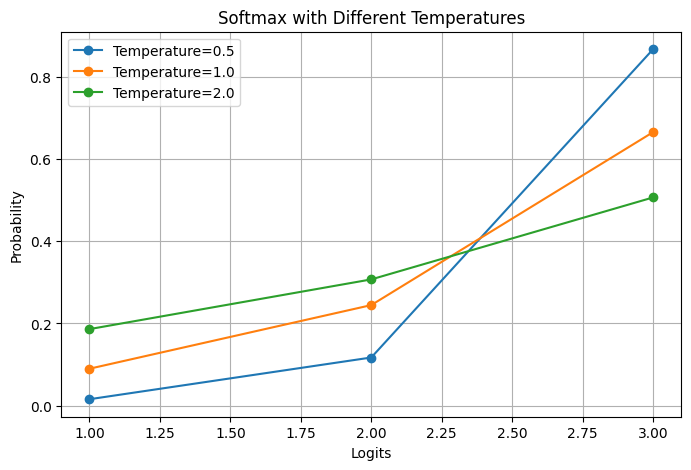

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def softmax(x, temperature=1.0):
    x = x / temperature
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x)


# Example logits
logits = np.array([1.0, 2.0, 3.0])
temperatures = [0.5, 1.0, 2.0]

# Compute softmax for different temperatures
for T in temperatures:
    probs = softmax(logits, T)
    print(f"Temperature {T}: {probs.round(3)}")

# Visualization
plt.figure(figsize=(8, 5))
for T in temperatures:
    probs = softmax(logits, T)
    plt.plot(logits, probs, marker="o", label=f"Temperature={T}")
plt.xlabel("Logits")
plt.ylabel("Probability")
plt.title("Softmax with Different Temperatures")
plt.legend()
plt.grid(True)
plt.show()

**Explanation**: This code computes the softmax function for different temperature values and visualizes how temperature affects the probability distribution.


## 7. Hugging Face and Inference API

Below are two demonstrations using Hugging Face's Inference API: text classification and text generation.


In [15]:
# Install dependencies (only run once)
!pip install -q transformers torch

from transformers import pipeline, logging
logging.set_verbosity_error()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Text Classification
classifier = pipeline(
    "sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english"
)

In [17]:
text = input("Enter some text upon which you want to do sentiment analysis : ")
classification_output = classifier(text)

print(f"Text Classification Example:")
print(f"Text: {text}")
print(f"Prediction: {classification_output}")

Enter some text upon which you want to do sentiment analysis : Teri ma ki chut
Text Classification Example:
Text: Teri ma ki chut
Prediction: [{'label': 'NEGATIVE', 'score': 0.9781257510185242}]


In [ ]:
import os
from openai import OpenAI

os.environ["HF_TOKEN"] = ""

In [19]:
client = OpenAI(
    base_url="https://router.huggingface.co/v1",
    api_key=os.environ["HF_TOKEN"],
)

In [ ]:
text = input("Ask Anything : ")
completion = client.chat.completions.create(
    model="meta-llama/Llama-3.1-8B-Instruct:novita",
    messages=[{"role": "user", "content": text}],
)

print(completion.choices[0].message.content)

Ask Anything : dfdssfd
It seems like you entered some random characters. If you'd like to talk about something, ask a question, or get information on a particular topic, I'm here to help. What's on your mind?
